In [23]:
import ast
from collections import Counter
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import os
import seaborn as sns
import warnings
import wfdb

sns.set_theme()

DATA_PATH = os.path.join(os.getcwd(), 'data', 'ptb-xl')

database = pd.read_csv(os.path.join(DATA_PATH, 'ptbxl_database.csv'), index_col = 0)
statements = pd.read_csv(os.path.join(DATA_PATH, 'scp_statements.csv'), index_col = 0)

## Exploratory Data Analysis on PTB-XL Dataset

In [21]:
print('The dataset contains', len(database), 'ECG records from', len(database.patient_id.unique()), 'patients')

The dataset contains 21799 ECG records from 18869 patients


In [101]:
# Some patients have multiple records:

count_record_per_patient = database.patient_id.value_counts()
count_record_per_patient.head(20)

# One patient can have at maximum 10 ECG records assigned to him 

9898.0     10
10107.0     9
8304.0      9
17542.0     9
8810.0      8
15765.0     8
13619.0     8
13145.0     8
20318.0     7
18675.0     7
21602.0     7
20655.0     7
10134.0     7
18837.0     6
15971.0     6
20537.0     6
13998.0     6
14299.0     6
15622.0     6
10099.0     6
Name: patient_id, dtype: int64

In [22]:
database.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21799.000000,21799.000000,21799.000000,6974.000000,9421.000000,20326.000000,21782.000000,12421.000000,21799.000000
mean,11250.156521,62.769301,0.479150,166.702323,70.995223,2.291745,1.544945,0.746075,5.503005
std,6235.026404,32.308813,0.499577,10.867321,15.878803,3.254033,4.172883,1.178003,2.874948
min,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5974.500000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,11419.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16607.500000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21797.000000,300.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


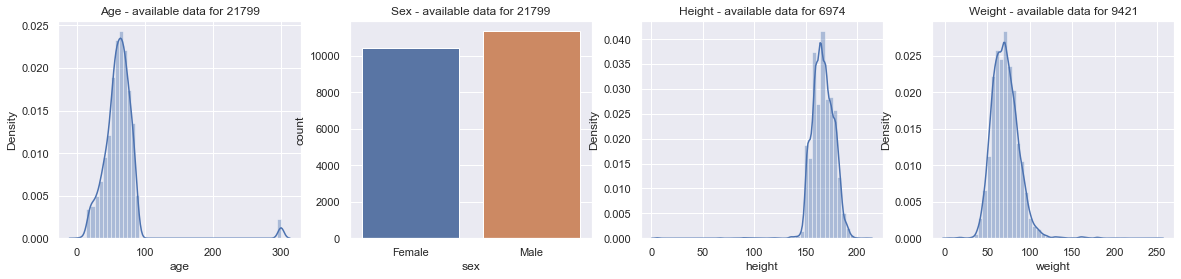

In [24]:
# Plot patients' characteristics distributions (age, sex, height, weight)
warnings.filterwarnings('ignore')

plt.figure(figsize = (20, 4))
plt.subplot(141), 
sns.distplot(database.age); plt.title('Age - available data for '+str(len(database[~pd.isna(database.age)])))
# ages of more than 89 years appear in the range of 300 years in compliance with HIPAA standards
plt.subplot(142), 
sns.countplot(database.sex.apply(lambda x: 'Male' if x==0 else 'Female')), plt.title('Sex - available data for '+str(len(database[~pd.isna(database.sex)])))
plt.subplot(143), 
sns.distplot(database.height); plt.title('Height - available data for '+str(len(database[~pd.isna(database.height)])))
plt.subplot(144), 
sns.distplot(database.weight); plt.title('Weight - available data for '+str(len(database[~pd.isna(database.weight)])));

count                   21799
unique                  21795
top       1992-02-06 11:47:42
freq                        2
first     1984-11-09 09:17:34
last      2001-06-11 16:43:01
Name: recording_date, dtype: object


these two records may be the same
ecg_id
11842    records100/11000/11842_lr
11843    records100/11000/11843_lr
Name: filename_lr, dtype: object


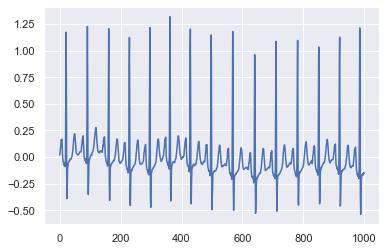

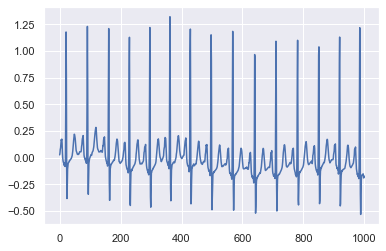

These two signals seem quite the same. However the values in mV are a bit different, but almost all shifted by the same quantity of 0.005 mV
[ 0.02   0.037  0.074  0.084  0.124  0.163  0.157  0.168  0.128  0.043
 -0.006 -0.034]
[ 0.025  0.042  0.078  0.089  0.129  0.168  0.162  0.173  0.133  0.048
 -0.001 -0.029]


<AxesSubplot:ylabel='Density'>

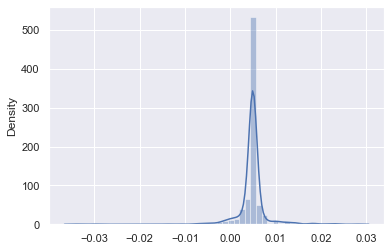

In [44]:
# Looking at recording_date - Possible duplicate record

print(pd.to_datetime(database.recording_date).describe())

for date in [k for k, v in Counter(database.recording_date).items() if v > 1]:
    if len(set(database[database.recording_date == date]['patient_id'])) == 1:
        print('\n\nthese two records may be the same')
        print(database[database.recording_date == date]['filename_lr'])
        break

x1 = np.asarray(wfdb.rdsamp(os.path.join(DATA_PATH, database[database.recording_date == date]['filename_lr'].iloc[0]))[0])
x2 = np.asarray(wfdb.rdsamp(os.path.join(DATA_PATH, database[database.recording_date == date]['filename_lr'].iloc[1]))[0])

plt.plot(x1[:, 1]), plt.show()
plt.plot(x2[:, 1]), plt.show()

print('These two signals seem quite the same. However the values in mV are a bit different, but almost all shifted by the same quantity of 0.005 mV')

print(x1[:12,1])
print(x2[:12,1])


sns.distplot(x2[:, 1]-x1[:, 1])

Text(0.5, 1.0, 'N = 103')

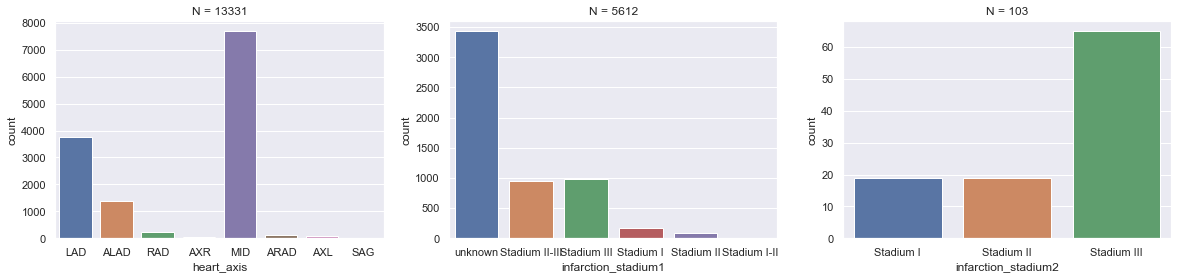

In [108]:
plt.figure(figsize = (20, 4))
plt.subplot(131), 
sns.countplot(database.heart_axis); plt.title('N = '+str(len(database[~pd.isna(database.heart_axis)])))
plt.subplot(132), 
sns.countplot(database.infarction_stadium1); plt.title('N = '+str(len(database[~pd.isna(database.infarction_stadium1)])))
plt.subplot(133), 
sns.countplot(database.infarction_stadium2); plt.title('N = '+str(len(database[~pd.isna(database.infarction_stadium2)])))

Text(0.5, 1.0, 'N = 21799')

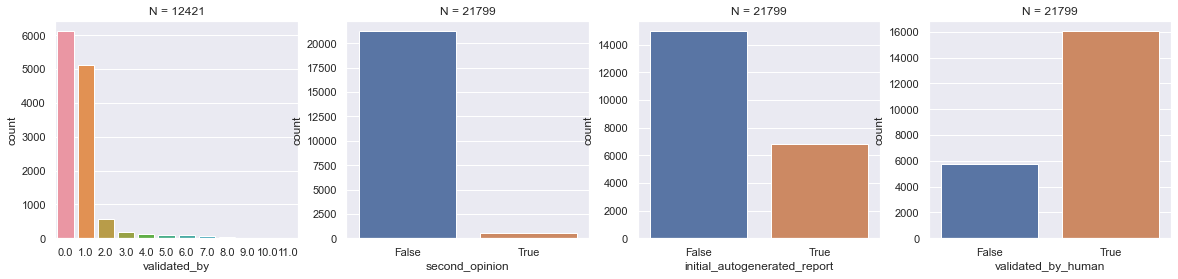

In [111]:
plt.figure(figsize = (20, 4))
plt.subplot(141), 
sns.countplot(database.validated_by); plt.title('N = '+str(len(database[~pd.isna(database.validated_by)])))
plt.subplot(142), 
sns.countplot(database.second_opinion); plt.title('N = '+str(len(database[~pd.isna(database.second_opinion)])))
plt.subplot(143), 
sns.countplot(database.initial_autogenerated_report); plt.title('N = '+str(len(database[~pd.isna(database.initial_autogenerated_report)])))
plt.subplot(144), 
sns.countplot(database.validated_by_human); plt.title('N = '+str(len(database[~pd.isna(database.validated_by_human)])))

In [112]:
print('SUMMARY of technical problems in ECG recordings')
print(len(database.baseline_drift.dropna()), 'recordings affected by baseline drift')
print(len(database.static_noise.dropna()), 'recordings affected by static noise')
print(len(database.burst_noise.dropna()), 'recordings affected by burst noise')
print(len(database.electrodes_problems.dropna()), 'recordings affected by electrodes probelms')
print('\n')
print('SUMMARY of "physiological problems" in the heart rhythm')
print(len(database.extra_beats.dropna()), 'exams with extra beats')
print(len(database.pacemaker.dropna()), 'pacemaker rhythms')

SUMMARY of technical problems in ECG recordings
1598 recordings affected by baseline drift
3260 recordings affected by static noise
613 recordings affected by burst noise
30 recordings affected by electrodes probelms


SUMMARY of "physiological problems" in the heart rhythm
1949 exams with extra beats
291 pacemaker rhythms


## Create Labels for Diagnostic Classes

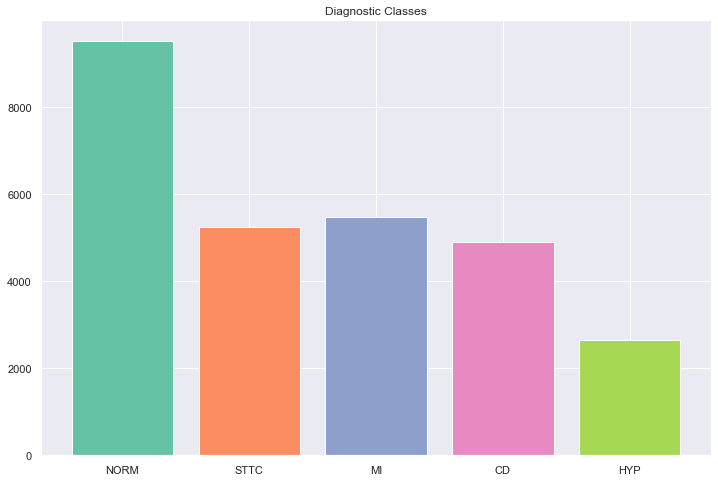

In [24]:
norm_scp = statements[statements.diagnostic_class == 'NORM'].index.tolist()
sttc_scp = statements[statements.diagnostic_class == 'STTC'].index.tolist()
mi_scp = statements[statements.diagnostic_class == 'MI'].index.tolist()
cd_scp = statements[statements.diagnostic_class == 'CD'].index.tolist()
hyp_scp = statements[statements.diagnostic_class == 'HYP'].index.tolist()

database['label'] = database.scp_codes.apply(lambda x: x[1:-1].split(', '))
database['label'] = database.label.apply(lambda label: [x[1:].split("': ") for x in label])
database['label'] = database.label.apply(lambda label: [(x[0], float(x[1])) for x in label])
database['likelihood'] = np.nan
database['flag_multiclass'] = np.nan

n_norm = database['label'].apply(lambda diagnosis: 1 if any(diag in norm_scp for diag, _ in diagnosis) else 0).sum() # 9514 instead od 9517
n_sttc = database['label'].apply(lambda diagnosis: 1 if any(diag in sttc_scp for diag, _ in diagnosis) else 0).sum() # 5235 instead of 5237
n_mi = database['label'].apply(lambda diagnosis: 1 if any(diag in mi_scp for diag, _ in diagnosis) else 0).sum() # 5469 instead of 5473
n_cd = database['label'].apply(lambda diagnosis: 1 if any(diag in cd_scp for diag, _ in diagnosis) else 0).sum() # 4898 instead of 4901
n_hyp = database['label'].apply(lambda diagnosis: 1 if any(diag in hyp_scp for diag, _ in diagnosis) else 0).sum() # 2649 - correct 

dict_counts = {'NORM':n_norm, 'STTC': n_sttc, 'MI':n_mi, 'CD':n_cd, 'HYP':n_hyp}

series = pd.Series(data = dict_counts.values(), index = dict_counts.keys())

plt.figure(figsize=(12,8))
ax = plt.bar(dict_counts.keys(), dict_counts.values(), label = 'Count', color = [sns.color_palette('Set2')[i] for i in range(5)])
plt.title('Diagnostic Classes');

In [25]:
diagnotic_subclasses = {k:0 for k in statements.diagnostic_subclass.unique()}

for i in database.index:
    for scp_code, _ in database.loc[i, 'label']:
        diagnotic_subclasses[statements.loc[scp_code, 'diagnostic_subclass']] += 1

# diagnotic_subclasses['NA'] = diagnotic_subclasses[np.nan]
del diagnotic_subclasses[np.nan]


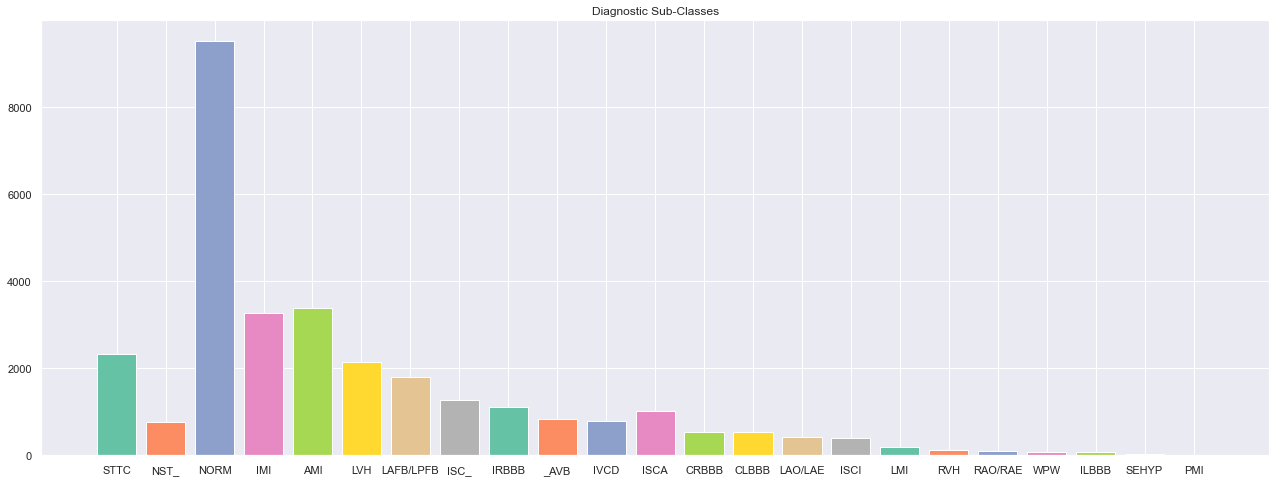

In [26]:
plt.figure(figsize=(22,8))
ax = plt.bar(diagnotic_subclasses.keys(), diagnotic_subclasses.values(), label = 'Count', color = list(sns.color_palette('Set2')*3)[:len(diagnotic_subclasses)])
plt.title('Diagnostic Sub-Classes');

# TODO: order / color subclasses belonging to the same class with same colors

In [27]:
for i, label in database['label'].items():
    # find maximum likelihood
    max_likelihood = max([x[1] for x in label])
    # select scp codes corresponding to max. likelihood
    scp = [x[0] for x in label if x[1] == max_likelihood]
    # select correspondent diagnostic class
    diagnostic_classes = [statements.loc[scp_, 'diagnostic_class'] for scp_ in scp]
    # filter nan
    diagnostic_classes = [x for x in diagnostic_classes if not pd.isnull(x)]
    # remove duplicates
    diagnostic_classes = list(set(diagnostic_classes))
    # final classification
    database.at[i, 'label'] = ', '.join(diagnostic_classes)
    database.at[i, 'likelihood'] = max_likelihood
    if len(diagnostic_classes) == 1:
        database.at[i, 'flag_multiclass'] = 0
    else:
        database.at[i, 'flag_multiclass'] = 1

database['flag_multiclass'] = database['flag_multiclass'].astype('int')

### Labels from Physionet

In [28]:
# database = pd.read_csv(os.path.join(DATA_PATH, 'ptbxl_database.csv'), index_col = 0)
# statements = pd.read_csv(os.path.join(DATA_PATH, 'scp_statements.csv'), index_col = 0)

database.scp_codes = database.scp_codes.apply(lambda x: ast.literal_eval(x))
statements = statements[statements.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in statements.index:
            tmp.append(statements.loc[key].diagnostic_class)
    return list(set(tmp))

database['diagnostic_superclass'] = database.scp_codes.apply(aggregate_diagnostic)
database['n_superclass'] = database['diagnostic_superclass'].apply(lambda x: len(x))


In [29]:
database[['scp_codes', 'label', 'likelihood', 'flag_multiclass', 'diagnostic_superclass', 'n_superclass']]

,scp_codes,label,likelihood,flag_multiclass,diagnostic_superclass,n_superclass
ecg_id,,,,,,
1,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
2,"{'NORM': 80.0, 'SBRAD': 0.0}",NORM,80.0,0,[NORM],1
3,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
4,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
5,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
...,...,...,...,...,...,...
21833,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",STTC,100.0,0,[STTC],1
21834,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
21835,"{'ISCAS': 50.0, 'SR': 0.0}",STTC,50.0,0,[STTC],1


### Labels' Comparison

In [30]:
data = database[['scp_codes', 'label', 'likelihood', 'flag_multiclass', 'diagnostic_superclass', 'n_superclass']]

In [33]:
data[(data.flag_multiclass == 0) & (data.likelihood == 100)]

,scp_codes,label,likelihood,flag_multiclass,diagnostic_superclass,n_superclass
ecg_id,,,,,,
1,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
3,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
4,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
5,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
6,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
...,...,...,...,...,...,...
21832,"{'LAFB': 100.0, 'IVCD': 100.0, 'SR': 0.0}",CD,100.0,0,[CD],1
21833,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",STTC,100.0,0,[STTC],1
21834,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1


In [34]:
data[data.n_superclass == 1]

,scp_codes,label,likelihood,flag_multiclass,diagnostic_superclass,n_superclass
ecg_id,,,,,,
1,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
2,"{'NORM': 80.0, 'SBRAD': 0.0}",NORM,80.0,0,[NORM],1
3,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
4,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
5,"{'NORM': 100.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
...,...,...,...,...,...,...
21833,"{'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...",STTC,100.0,0,[STTC],1
21834,"{'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}",NORM,100.0,0,[NORM],1
21835,"{'ISCAS': 50.0, 'SR': 0.0}",STTC,50.0,0,[STTC],1


In [36]:
joined_indexes = pd.merge(data[(data.flag_multiclass == 0) & (data.likelihood == 100)], data[data.n_superclass == 1], how = 'inner', left_index = True, right_index = True).index

data[(data.flag_multiclass == 0) & (data.likelihood == 100)].drop(joined_indexes)

,scp_codes,label,likelihood,flag_multiclass,diagnostic_superclass,n_superclass
ecg_id,,,,,,
39,"{'IMI': 15.0, 'LNGQT': 100.0, 'NST_': 100.0, '...",STTC,100.0,0,"[STTC, MI]",2
45,"{'IRBBB': 100.0, 'RAO/RAE': 50.0, 'RVH': 35.0,...",CD,100.0,0,"[CD, HYP]",2
50,"{'LMI': 15.0, 'IVCD': 100.0, 'SR': 0.0}",CD,100.0,0,"[CD, MI]",2
77,"{'AMI': 50.0, 'IRBBB': 100.0, 'SR': 0.0}",CD,100.0,0,"[CD, MI]",2
102,"{'ISCAL': 50.0, '1AVB': 100.0, 'SR': 0.0}",CD,100.0,0,"[CD, STTC]",2
...,...,...,...,...,...,...
21797,"{'LVH': 50.0, 'ISC_': 100.0, 'AFIB': 0.0}",STTC,100.0,0,"[STTC, HYP]",2
21821,"{'NORM': 80.0, 'IRBBB': 100.0, 'SR': 0.0}",CD,100.0,0,"[CD, NORM]",2
21827,"{'IMI': 100.0, 'ISCLA': 50.0, 'ABQRS': 0.0, 'S...",MI,100.0,0,"[STTC, MI]",2


In [37]:
data[(data.n_superclass == 1)].drop(joined_indexes)

,scp_codes,label,likelihood,flag_multiclass,diagnostic_superclass,n_superclass
ecg_id,,,,,,
2,"{'NORM': 80.0, 'SBRAD': 0.0}",NORM,80.0,0,[NORM],1
8,"{'IMI': 35.0, 'ABQRS': 0.0, 'SR': 0.0}",MI,35.0,0,[MI],1
11,"{'NORM': 80.0, 'SARRH': 0.0}",NORM,80.0,0,[NORM],1
12,"{'NORM': 80.0, 'SBRAD': 0.0}",NORM,80.0,0,[NORM],1
27,"{'NORM': 80.0, 'SR': 0.0}",NORM,80.0,0,[NORM],1
...,...,...,...,...,...,...
21823,"{'NORM': 50.0, 'SR': 0.0}",NORM,50.0,0,[NORM],1
21824,"{'AMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}",MI,15.0,0,[MI],1
21826,"{'IMI': 80.0, 'ABQRS': 0.0, 'SARRH': 0.0}",MI,80.0,0,[MI],1


Explanation for the differnece between the two labels: the fact that I have taken into account also the likelihood, assigning a single class when the associated likelihood was greater than the other. 
Also, I excluded those cases where likelihood was not 100%.
